In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
file_path = 'project_results.txt'
df = pd.read_csv(file_path, sep=';')

columns = ['Model', 'Epochs', 'Learning Rate', 'Accuracy', 'Parameters','Factorized', 'Quantize', 'DA', 'Prune Size', 'Prune Type','Prune Ratio[%]', 'Time[min]', 'Train Losses', 'Test Losses','Accuracies', ' batch_size']

print(df[columns])


          Model  Epochs  Learning Rate  Accuracy  Parameters  Factorized  \
0  PreActResNet      50           0.05     82.67     4946596       False   
1  PreActResNet      50           0.05     77.35     4946596       False   
2  PreActResNet      50           0.05     86.34     4946596       False   
3  PreActResNet      50           0.05     87.67     4946596       False   
4  PreActResNet      50           0.05     74.73     4946596       False   

  Quantize     DA  Prune Size Prune Type  Prune Ratio[%]  Time[min]  \
0     None  False           0       None             0.3  36.073565   
1     None  False           0       None             0.3  47.060758   
2     None  False           0       None             0.3  30.790090   
3     None  False           0       None             0.3  38.926911   
4     None   True           0       None             0.3  58.674924   

                                        Train Losses  \
0  [2.018340105134863, 1.4209918731004858, 1.1188...   
1  [

In [15]:
epochs = 'Epochs'
acc = 'Accuracy'
lr = 'Learning Rate'
MX = 'MixUp'
params = 'Parameters'
amount = 'Amount'

In [16]:
def convert_to_float(value):
    try:
        return float(value)
    except ValueError:
        return float(value.replace('[', '').replace(']', '').split(',')[0])  # Assuming the first value is correct

In [68]:
# Extract relevant columns

def plot_results(wea):

    epochs = wea['Epochs']
    epochs = range(1,epochs+1)

    train_losses = wea['Train Losses'].strip('[]').split(',')
    train_losses = np.array(train_losses, dtype=float).astype(float)
    test_losses = wea['Test Losses'].strip('[]').split(',')
    test_losses = np.array(test_losses, dtype=float).astype(float)


    plt.figure(1)
    plt.plot(epochs, train_losses, label='Train Losses', color='blue', alpha=0.5)
    plt.plot(epochs, test_losses, label='Test Losses', color='red', alpha=0.5)

    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.title('Losses over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()
    # plt.savefig('images/Project/PreAct_100_DA_losses.png')

    # plt.figure(2)
    # plt.plot(epochs, accuracies.iloc[1], label='Accuracies')

    # plt.title('Accuracy over Epochs')
    # plt.legend()
    # plt.xlabel('Epochs')
    # plt.ylabel('Value')
    # plt.grid(True)
    # plt.show()
    # plt.savefig('images/Project/PreAct_100_DA_accuracies.png')


In [69]:
train_losses = df.iloc[0]['Train Losses'].strip('[]').split(',')

ls = [type(item) for item in train_losses]
print(ls)

[<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]


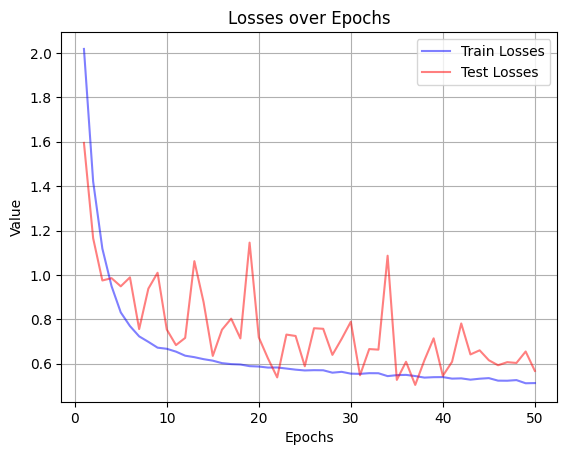

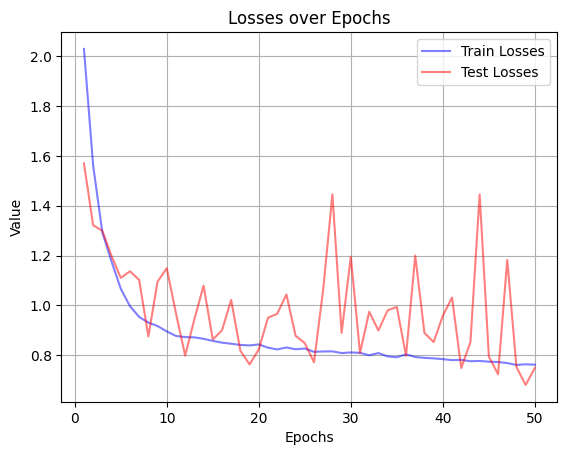

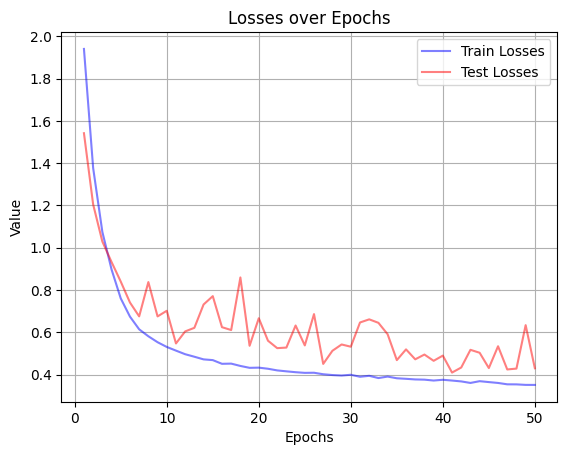

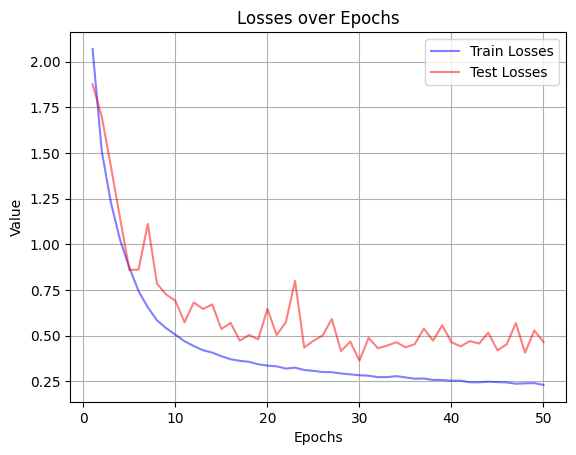

In [72]:
for i in range(0,4):
    wea = df.iloc[i]
    # print(wea['Train Losses'].strip('[]').split(','))
    plot_results(wea)